### 라이브러리 import & Data Load

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# data load
df = pd.read_csv('Boston_house.csv')

In [3]:
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


각 변수의 의미
  - CRIM : 지역 범죄율
  - ZN : 25,000 제곱 피트 이상의 주택지 비율
  - INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
  - CHAS : CHarles 강과 접하고 있는지 여부
  - NOX : 산화질소 농도
  - RM : 자택당 평균 방 갯수
  - AGE : 1940년 이전에 건설된 주택의 비율
  - DIS : 5개의 보스턴 직업센터까지의 접근성 지수
  - RAD : 방사형 도로까지의 접근성 지수
  - TAX : 10,000 달러 당 재산세율
  - PTRATIO : 학생 교사 비율
  - B : 흑인 지수
  - LSTAT : 빈곤층 비율

### 데이터 파악(EDA)

In [4]:
# 그래프 배경 설정
sns.set_style('darkgrid')

In [5]:
df.shape

(506, 14)

In [6]:
# 결측치 확인
df.isnull().sum()

AGE        0
B          0
RM         0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
ZN         0
TAX        0
CHAS       0
Target     0
dtype: int64

각 column 별 결측치 없음

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


모두 숫자형 데이터

In [8]:
df.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


### 목표 변수 탐색

<AxesSubplot:>

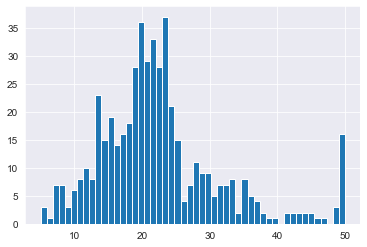

In [9]:
# 분포 확인
df['Target'].hist(bins=50)

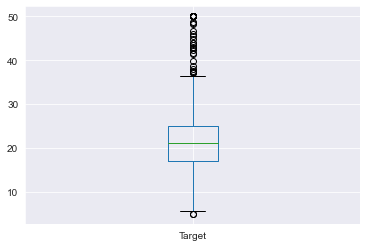

In [10]:
df.boxplot(column=['Target'])
plt.show()

주택 가격이 15,000 에서 25,000 사이에 존재하고 40,000 이상의 값들도 소수 존재함

### 설명 변수 탐색

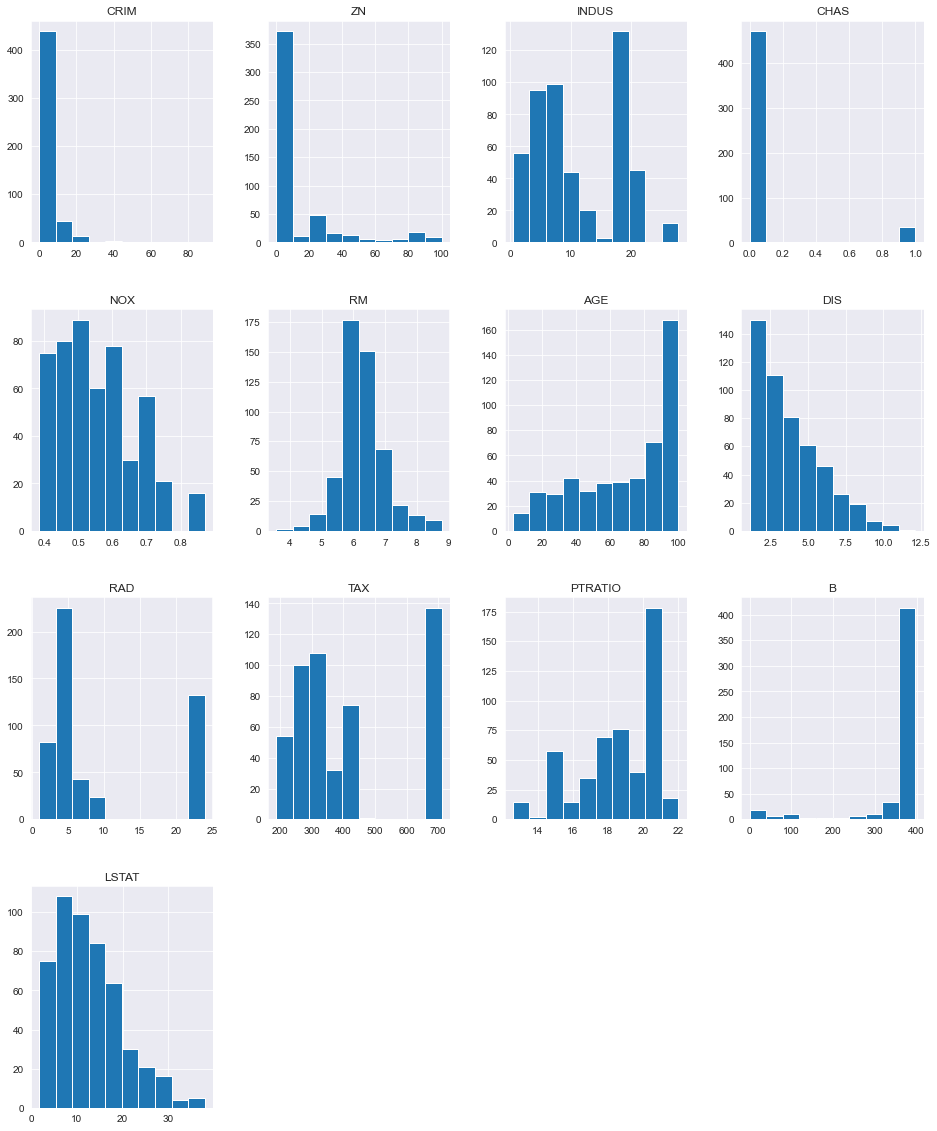

In [11]:
# 설명 변수 분포 파악

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig = plt.figure(figsize= (16, 20))
ax = fig.gca() # Axes 객체(하나의 플롯) 얻을 수 있음

df[columns].hist(ax=ax)
plt.show()

### 설명 변수와 목표 변수의 관계

In [12]:
# Pearson 상관계수

columns_all = ['Target', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

corr = df[columns_all].corr(method = 'pearson')
corr

,Target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
Target,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


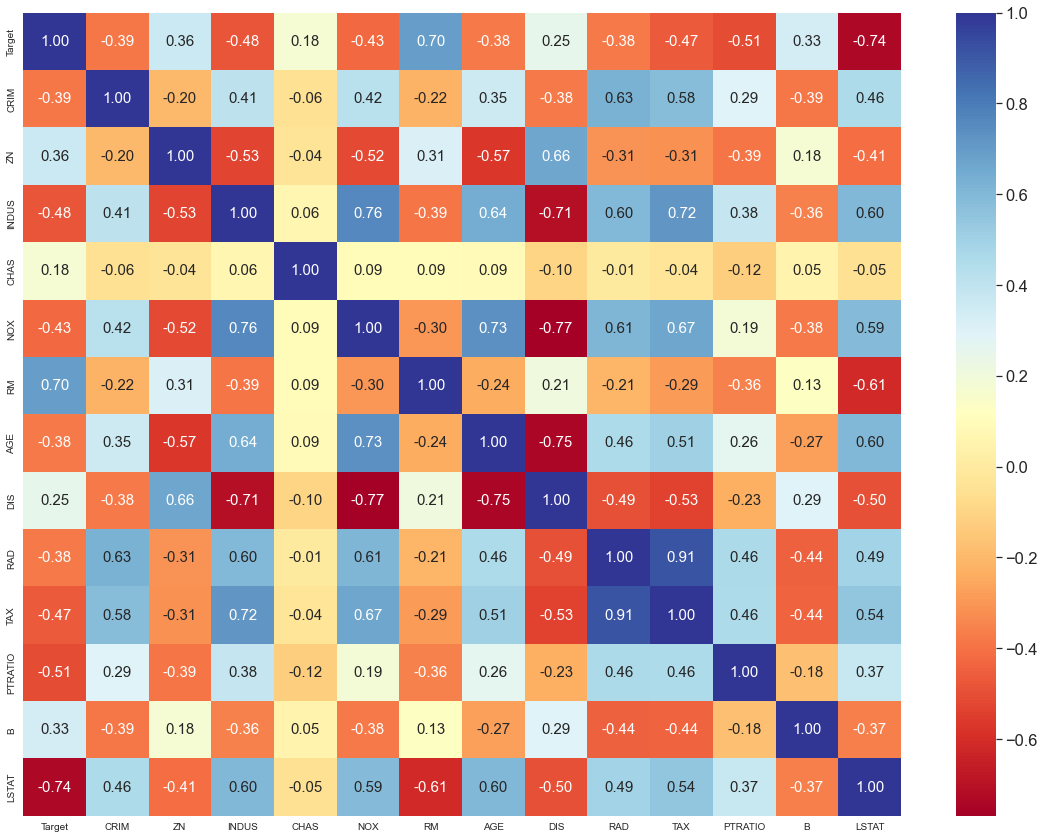

In [13]:
# heatmap
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15}, 
                      yticklabels = columns_all, xticklabels = columns_all, ax=ax, cmap='RdYlBu')

plt.tight_layout()
plt.show()

집값과 방개수가 상관관계가 0.7 이고, 빈곤층 비율과의 상관관계가 -0.74 이다.

### 목표 변수와 설명 변수간의 관계

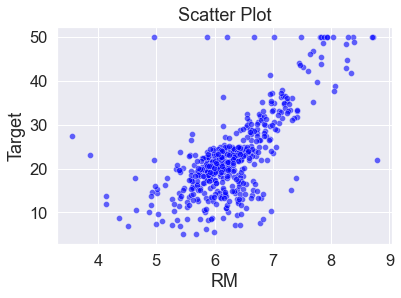

In [14]:
# scatter plot
sns.scatterplot(data=df, x='RM', y='Target', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

집값과 방 개수는 양의 상관관계를 가지고 있는것으로 나타남

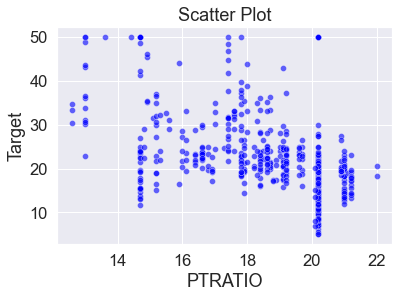

In [15]:
# scatter plot
sns.scatterplot(data=df, x='PTRATIO', y='Target', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

상관관계가 명확하지 않음

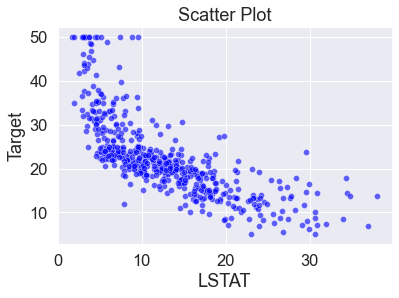

In [16]:
# scatter plot
sns.scatterplot(data=df, x='LSTAT', y='Target', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

집값과 빈곤층의 비율은 음의 상관관계가 있음

### 학습데이터, 테스트데이터 나누기

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = ['RM', 'LSTAT']
df[features] = scaler.fit_transform(df[features])

In [18]:
df[features].head()

,RM,LSTAT
0,0.413672,-1.075562
1,0.194274,-0.492439
2,1.282714,-1.208727
3,1.016303,-1.361517
4,1.228577,-1.026501


In [19]:
from sklearn.model_selection import train_test_split

features = ['RM', 'LSTAT']

X = df[features]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [20]:
X_train.shape, y_train.shape

((404, 2), (404,))

In [21]:
X_test.shape, y_test.shape

((102, 2), (102,))

### 모델 학습

In [22]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [23]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9983912034435461
0.6382841408199046


In [25]:
pred = model.predict(X_test)
print(mean_squared_error(pred, y_test))

29.453957796968936


테스트 정확도가 너무 낮은 것 같습니다. ---> 변수를 더 추가하고 다중공정성을 제거한후 다시 학습시켜 보겠습니다

In [26]:
columns_all = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

features = df[columns_all]
# scaler = MinMaxScaler()
# df[columns_all] = scaler.fit_transform(df[columns_all])

In [27]:
# df[columns_all].head()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = features.columns
vif['VIF Factor'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif.round(1)



,features,VIF Factor
0,CRIM,2.1
1,ZN,2.8
2,INDUS,14.3
3,CHAS,1.2
4,NOX,55.7
5,RM,1.9
6,AGE,21.4
7,DIS,14.2
8,RAD,15.3
9,TAX,61.4


### 다중공정성제거 - 정규화

In [29]:
scaler = StandardScaler()
scale_features = scaler.fit_transform(features)

new_features_df = pd.DataFrame(scale_features)
new_features_df.columns = features.columns


vif = pd.DataFrame()
vif['features'] = new_features_df.columns
vif['VIF Factor'] = [variance_inflation_factor(new_features_df.values, i) for i in range(new_features_df.shape[1])]
vif.round(1)

,features,VIF Factor
0,CRIM,1.8
1,ZN,2.3
2,INDUS,4.0
3,CHAS,1.1
4,NOX,4.4
5,RM,1.9
6,AGE,3.1
7,DIS,4.0
8,RAD,7.5
9,TAX,9.0


In [30]:
X = new_features_df
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [32]:
y_train.shape, y_test.shape

((404,), (102,))

In [33]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

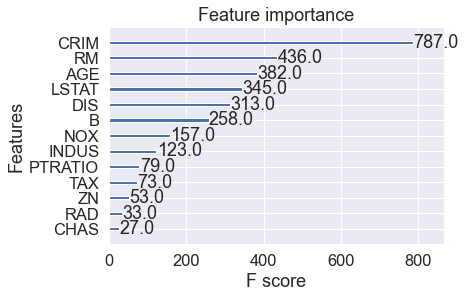

In [34]:
from xgboost import plot_importance

plot_importance(model)

In [35]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.999996496464714
0.7376113655942435


In [36]:
from lightgbm import LGBMRegressor

model_2 = LGBMRegressor()
model_2.fit(X_train, y_train)

LGBMRegressor()

In [37]:
print(model_2.score(X_train, y_train))
print(model_2.score(X_test, y_test))

0.9776053894912221
0.7003984399105389


모든 특징을 활용하여 다중공정성을 정규화를 통해 제거한 뒤 학습시켰을 때가 성능이 더 높게 나왔다. 하지만 아직 70% 대에 머물러있고, 성능을 개선시킬 방법을 찾아보겠다

In [38]:
important_features = ['CRIM', 'RM', 'AGE', 'LSTAT']

X = new_features_df[important_features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9999485323909486
0.7158861744496592


In [41]:
new_features_df.drop('CRIM', inplace=True, axis=1)
new_features_df.drop('AGE', inplace=True, axis=1)
#new_features_df.drop('DIS', inplace=True, axis=1)
new_features_df.head()

,ZN,INDUS,CHAS,NOX,RM,RAD,TAX,PTRATIO,B,LSTAT
0,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [42]:
X = new_features_df
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [44]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9999801953718247
0.7100475745313497


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

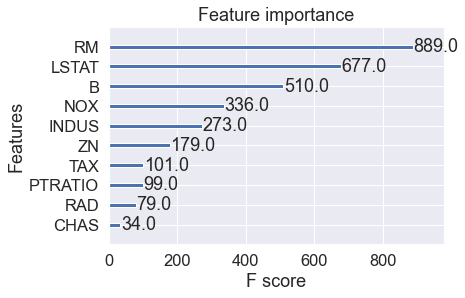

In [45]:
plot_importance(model)